# Epsilon-Greedy Algoritme

## Banditt

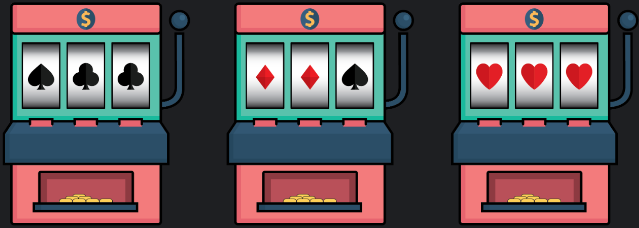

### Estimert sannsynlighet for gevinst

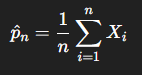

### Regn ut p̂ inkrementelt

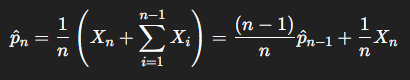

In [1]:
import matplotlib.pyplot as plt
import numpy as np


class Bandit:
    """
    Args:
        p (float): Sannsynlighet for gevinst.

    Attributes:
        p_hat (float): Estimert sannsynlighet for gevinst.
        N (int): Antall trekk.
    """

    def __init__(self, p):
        self.p = p
        self.p_hat = 0.0
        self.N = 0

    def pull(self):
        return np.random.random() < self.p

    def update(self, x):
        self.N += 1
        self.p_hat = ((self.N - 1) * self.p_hat + x) / self.N



## Epsilon-Greedy

In [ ]:
def epsilon_greedy(bandits, epsilon):
    # True => Explore, False = Exploit
    if np.random.random() < epsilon:
        return np.random.randint(len(bandits)), True
    else:
        return np.argmax([b.p_hat for b in bandits]), False


### Eksempel

Optimal j: 2
mean estimate: 0.23611111111111122
mean estimate: 0.5384615384615385
mean estimate: 0.7289088863892016
total reward earned: 686.0
overall win rate: 0.686
num_times_explored: 117
num_times_exploited: 883
num times selected optimal bandit: 889


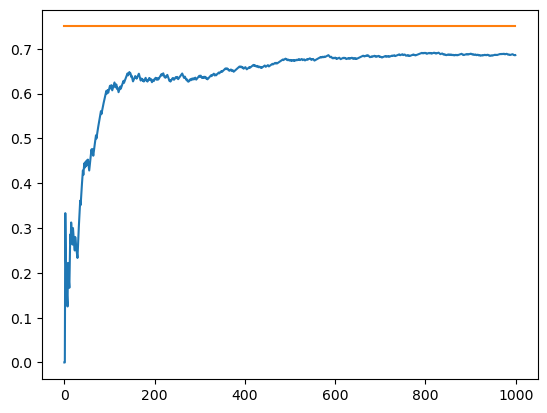

In [9]:
def experiment(trials, epsilon, probabilities):
    # j: index of bandit

    bandits = [Bandit(p) for p in probabilities]
    optimal_j = np.argmax([b.p for b in bandits])
    print(f"Optimal j: {optimal_j}")

    rewards = np.zeros(trials)
    num_times_explored = 0
    num_times_exploited = 0
    num_optimal = 0

    for i in range(trials):
        # Velg banditt
        j, explore = epsilon_greedy(bandits, epsilon)

        if explore:
            num_times_explored += 1
        else:
            num_times_exploited += 1

        if j == optimal_j:
            num_optimal += 1

        # Banditt j har den største estimert sannsynlighet for gevinst
        x = bandits[j].pull()

        rewards[i] = x

        # Oppdater p_hat for den valgte banditten
        bandits[j].update(x)

    # Print mean estimation for each bandit
    for b in bandits:
        print(f"mean estimate: {b.p_hat}")

    # Print total reward
    print("total reward earned:", rewards.sum())
    print("overall win rate:", rewards.sum() / trials)
    print("num_times_explored:", num_times_explored)
    print("num_times_exploited:", num_times_exploited)
    print("num times selected optimal bandit:", num_optimal)

    # plot the results
    cumulative_rewards = np.cumsum(rewards)
    win_rates = cumulative_rewards / (np.arange(trials) + 1)
    plt.plot(win_rates)
    plt.plot(np.ones(trials)*np.max(probabilities))
    plt.show()


experiment(1000, 0.1, [0.2, 0.5, 0.75])